In [1]:
import math as m
from datetime import datetime

# Pontos

![pontos](/home/user/Documents/Matematica/vetorgradiente/pontos.png)


# Tarefa 1

## A

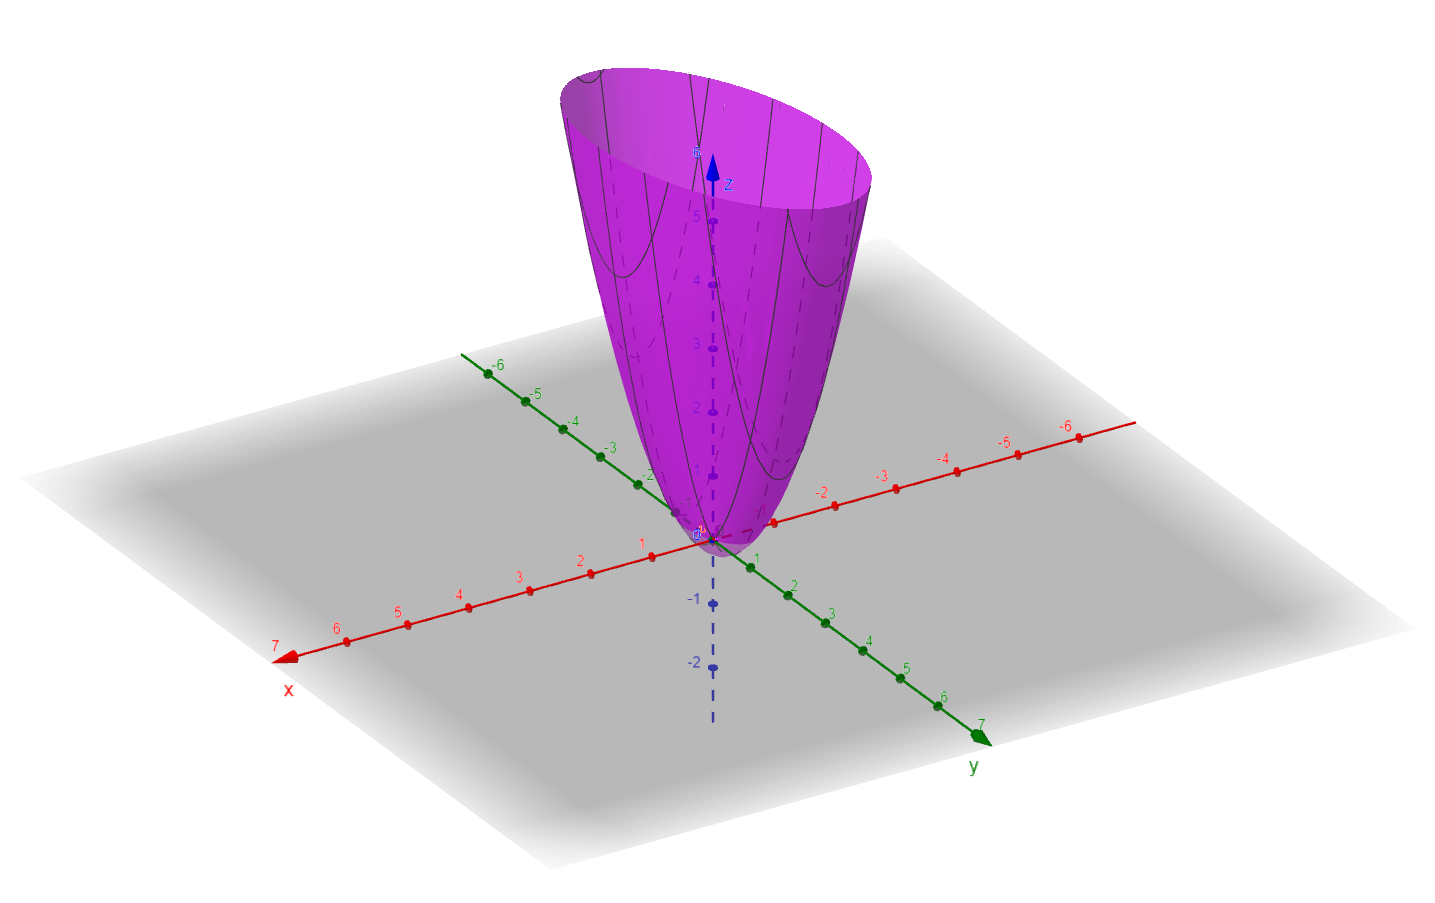

## B

$$ f(x,y) = 3x^2 + xy + y^2 +2x + y $$

$$ \frac{\partial f}{\partial x} = 6x + y + 2 $$

$$ \frac{\partial f}{\partial y} = x + 2y + 1 $$

$$ \nabla f = (\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}) = (6x + y + 2, x + 2y + 1) $$

## C e D

In [6]:
# Funções


def f(x: float, y: float) -> float:
    return (3 * m.pow(x, 2)) + (x * y) + (m.pow(y, 2)) + (2 * x) + (y)


def f_x(x: float, y: float) -> float:
    return (6 * x) + (y) + (2)


def f_y(x: float, y: float) -> float:
    return (x) + (2 * y) + (1)


def f_grad(x: float, y: float) -> tuple[float, float]:
    mod = 1
    # mod = m.sqrt(m.pow(f_x(x, y), 2) + m.pow(f_y(x, y), 2))
    return (f_x(x, y) / mod, f_y(x, y) / mod)


# Otimização


def minimizar_f(
    point: tuple[float, float],
    alpha: float,
    threshold: float,
) -> tuple[tuple[float, float], int]:
    print(f"---- Passo: {alpha} ----")
    print(f"Ponto inicial: {point}")

    def is_min(x: float, y: float) -> bool:
        return abs(x) < threshold and abs(y) < threshold

    iterations: int = 0
    start = datetime.now()
    while not is_min(*f_grad(*point)):
        # print(point, f_grad(*point))
        iterations += 1
        point: tuple[float, float] = (
            point[0] + (alpha * -f_x(*point)),
            point[1] + (alpha * -f_y(*point)),
        )
        if m.isnan(point[0]) or m.isnan(point[1]):
            print("Overflow!")
            break
    end = datetime.now()
    delta = end - start

    print(f"Ponto minimo: {point}")
    print(f"N de iterações: {iterations}")
    print(f"Tempo: {delta}")


# Parâmetros
minimizar_f((0, 0), 0.1, m.pow(10, -5))
minimizar_f((0, 0), 0.15, m.pow(10, -5))
minimizar_f((0, 0), 0.2, m.pow(10, -5))
minimizar_f((0, 0), 0.3, m.pow(10, -5))
minimizar_f((0, 0), 0.5, m.pow(10, -5))


---- Passo: 0.1 ----
Ponto inicial: (0, 0)
Ponto minimo: (-0.2727285486985472, -0.36363095853530786)
N de iterações: 56
Tempo: 0:00:00
---- Passo: 0.15 ----
Ponto inicial: (0, 0)
Ponto minimo: (-0.2727283212854633, -0.36363192187259014)
N de iterações: 36
Tempo: 0:00:00
---- Passo: 0.2 ----
Ponto inicial: (0, 0)
Ponto minimo: (-0.2727285366369195, -0.36363100962918343)
N de iterações: 25
Tempo: 0:00:00
---- Passo: 0.3 ----
Ponto inicial: (0, 0)
Ponto minimo: (-0.27272880264008664, -0.36363672479978737)
N de iterações: 89
Tempo: 0:00:00
---- Passo: 0.5 ----
Ponto inicial: (0, 0)
Overflow!
Ponto minimo: (nan, -inf)
N de iterações: 947
Tempo: 0:00:00.001003


## Resultados

Com passo igual a $0.1$ foi necessário 56 iterações para alcançar o ponto mínimo (-0.2727285486985472, -0.36363095853530786) com uma prescrição de $10^{-5}$

Ao alterar o passo inicialmente se nota uma diminuição no numero de iterações necessárias, porem a partir de 0.3 o numero cresce e no 0.5 nao converge

# Tarefa 2

![g](/home/user/Documents/Matematica/vetorgradiente/g.png)

$$ g(x,y) = \sqrt{x^2 + y^2 + 3} + x^{2}e^{-y^2}+ (x - 2)^2 $$

$$ \frac{\partial g}{\partial x} = \frac{x}{\sqrt{x^2 + y^2 + 3}} + 2e^{-y^2}x + 2(x-2) $$

$$ \frac{\partial g}{\partial y} = \frac{y}{\sqrt{x^2 + y^2 + 3}} - 2e^{-y^2}x^2y $$

$$ \nabla g = (\frac{\partial g}{\partial x},\frac{\partial g}{\partial y}) = (\frac{x}{\sqrt{x^2 + y^2 + 3}} + 2e^{-y^2}x + 2(x-2),\frac{y}{\sqrt{x^2 + y^2 + 3}} - 2e^{-y^2}x^2y) $$


In [7]:
# Funções


def g(x: float, y: float) -> float:
    return (
        m.sqrt(m.pow(x, 2) + m.pow(y, 2) + 3)
        + (m.pow(x, 2) * m.pow(m.e, (-m.pow(y, 2))))
        + m.pow(x - 2, 2)
    )


def g_x(x: float, y: float) -> float:
    return (
        (x / (m.sqrt(m.pow(x, 2) + m.pow(y, 2) + 3)))
        + (2 * m.pow(m.e, (-m.pow(y, 2))) * x)
        + 2 * (x - 2)
    )


def g_y(x: float, y: float) -> float:
    return (y / (m.sqrt(m.pow(x, 2) + m.pow(y, 2) + 3))) - (
        2 * m.pow(m.e, (-m.pow(y, 2))) * m.pow(x, 2) * y
    )


def g_grad(x: float, y: float) -> tuple[float, float]:
    mod = 1
    # mod = m.sqrt(m.pow(g_x(x, y), 2) + m.pow(g_y(x, y), 2))
    return (g_x(x, y) / mod, g_y(x, y) / mod)


# Otimização


def minimizar_g(
    point: tuple[float, float],
    alpha: float,
    threshold: float,
) -> tuple[tuple[float, float], int]:
    print(f"---- Passo: {alpha} ----")
    print(f"Ponto inicial: {point}")

    def is_min(x: float, y: float) -> bool:
        return abs(x) < threshold and abs(y) < threshold

    iterations: int = 0
    start = datetime.now()
    while not is_min(*g_grad(*point)):
        # print(point, g_grad(*point))
        iterations += 1
        point: tuple[float, float] = (
            point[0] + (alpha * -g_x(*point)),
            point[1] + (alpha * -g_y(*point)),
        )
        if m.isnan(point[0]) or m.isnan(point[1]):
            print("Overflow!")
            break
    end = datetime.now()
    delta = end - start

    print(f"Ponto minimo: {point}")
    print(f"N de iterações: {iterations}")
    print(f"Tempo: {delta}")


# Parâmetros

minimizar_g((0, 1), 0.1, m.pow(10, -5))
minimizar_g((0, -1), 0.1, m.pow(10, -5))


---- Passo: 0.1 ----
Ponto inicial: (0, 1)
Ponto minimo: (1.612686364116112, 1.6454673160139657)
N de iterações: 98
Tempo: 0:00:00
---- Passo: 0.1 ----
Ponto inicial: (0, -1)
Ponto minimo: (1.612686364116112, -1.6454673160139657)
N de iterações: 98
Tempo: 0:00:00.000998


## Resultados

Os pontos sao (1.612686364116112, 1.6454673160139657) e ((1.612686364116112, -1.6454673160139657)1.612686364116112, -1.6454673160139657)

Para obter os dois pontos foi modificado o ponto inicial

<!-- TODO convergencia para diferentes passos -->

# Tarefa 3

![h](/home/user/Documents/Matematica/vetorgradiente/h.png)

$$ h(x,y) = 4e^{-x^{2}-y^{2}} + 3e^{-x^{2}-y^{2}+4x+6y-13} - \frac{x^2}{7} - \frac{y^2}{12} + 2 $$

$$ \frac{\partial h}{\partial x} = -8e^{-x^2-y^2}x-\frac{2x}{7}+3e^{-x^2+4x+6y-y^2-13}(-2x + 4) $$

$$ \frac{\partial h}{\partial y} = -8e^{-x^2-y^2}y-\frac{y}{6}+3e^{-x^2+4x+6y-y^2-13}(6 - 2y) $$

$$ \nabla h = (\frac{\partial h}{\partial x},\frac{\partial h}{\partial y}) = (-8e^{-x^2-y^2}x-\frac{2x}{7}+3e^{-x^2+4x+6y-y^2-13},-8e^{-x^2-y^2}y-\frac{y}{6}+3e^{-x^2+4x+6y-y^2-13}) $$


In [4]:
# Funções


def h(x: float, y: float) -> float:
    return (
        4 * m.pow(m.e, -(x**2) - (y**2))
        + 3 * m.pow(m.e, -(x**2) - (y**2) + 4 * x + 6 * y - 13)
        - (x**2 / 7)
        - (y**2 / 12)
        + 2
    )


def h_x(x: float, y: float) -> float:
    return (
        (-8 * m.pow(m.e, -(x**2) - (y**2)) * x)
        - ((2 * x) / 7)
        + 3
        * m.pow(m.e, -(x**2) + 4 * x + 6 * y - (y**2) - 13)
        * (-(2 * x) + 4)
    )


def h_y(x: float, y: float) -> float:
    return (
        (-8 * m.pow(m.e, -(x**2) - y**2) * y)
        - (y / 6)
        + 3 * m.pow(m.e, -(x**2) + 4 * x + 6 * y - (y**2) - 13) * (6 - (2 * y))
    )


def h_grad(x: float, y: float) -> tuple[float, float]:
    mod = 1
    # mod = m.sqrt(m.pow(h_x(x, y), 2) + m.pow(h_y(x, y), 2))
    return (h_x(x, y) / mod, h_y(x, y) / mod)


# Otimização


def minimizar_h(
    point: tuple[float, float],
    alpha: float,
    threshold: float,
) -> tuple[tuple[float, float], int]:
    print(f"---- Passo: {alpha} ----")
    print(f"Ponto inicial: {point}")

    def is_min(x: float, y: float) -> bool:
        return abs(x) < threshold and abs(y) < threshold

    iterations: int = 0
    start = datetime.now()
    while not is_min(*h_grad(*point)):
        # print(point, h_grad(*point))
        iterations += 1
        point: tuple[float, float] = (
            point[0] + (alpha * h_x(*point)),
            point[1] + (alpha * h_y(*point)),
        )
        if m.isnan(point[0]) or m.isnan(point[1]):
            print("Overflow!")
            break
    end = datetime.now()
    delta = end - start

    print(f"Ponto minimo: {point}")
    print(f"N de iterações: {iterations}")
    print(f"Tempo: {delta}")


# Parâmetros

minimizar_h((0, 0), 0.1, m.pow(10, -5))
minimizar_h((10, 10), 0.1, m.pow(10, -5))

---- Passo: 0.1 ----
Ponto inicial: (0, 0)
Ponto minimo: (2.712395288377267e-06, 4.0685929325659015e-06)
N de iterações: 1
Tempo: 0:00:00
---- Passo: 0.1 ----
Ponto inicial: (10, 10)
Ponto minimo: (1.907742565615503, 2.917685246264727)
N de iterações: 65
Tempo: 0:00:00


## Resultados

os pontos sao (0,0) e (1.907742565615503, 2.917685246264727)

# Tarefa desafio


In [9]:
def minimizar_f_alpha_var(
    point: tuple[float, float],
    threshold: float,
) -> tuple[tuple[float, float], int]:
    alpha: float = 0.1  # TODO calculate alpha
    print(f"---- Passo variável inicial {alpha} ----")
    print(f"Ponto inicial: {point}")

    def is_min(x: float, y: float) -> bool:
        return abs(x) < threshold and abs(y) < threshold

    iterations: int = 0
    start = datetime.now()
    while not is_min(*f_grad(*point)):
        alpha: float = alpha  # TODO calculate alpha
        iterations += 1
        point: tuple[float, float] = (
            point[0] + (alpha * -f_x(*point)),
            point[1] + (alpha * -f_y(*point)),
        )
        if m.isnan(point[0]) or m.isnan(point[1]):
            print("Overflow!")
            break
    end = datetime.now()
    delta = end - start

    print(f"Ponto minimo: {point}")
    print(f"N de iterações: {iterations}")
    print(f"Tempo: {delta}")


# Parâmetros
minimizar_f_alpha_var((0, 0), m.pow(10, -5))

---- Passo variável inicial 0.1 ----
Ponto inicial: (0, 0)
Ponto minimo: (-0.2727285486985472, -0.36363095853530786)
N de iterações: 56
Tempo: 0:00:00
